In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('placement.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [7]:
df.shape

(100, 4)

In [8]:
df = df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [10]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [11]:
import matplotlib.pyplot as plt


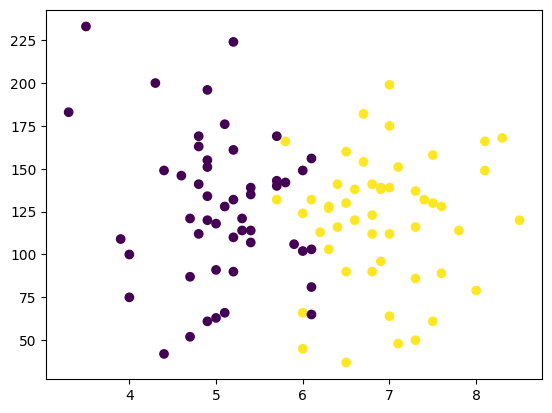

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [13]:
# seperating independent features and dependent features...
X = df.iloc[:,0:2] 
y = df.iloc[:,-1]

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y.shape

(100,)

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1) # splitting train and test data..

In [17]:
X_train

,cgpa,iq
8,6.1,156.0
36,5.7,140.0
26,7.0,199.0
48,6.6,138.0
27,6.0,124.0
...,...,...
87,5.7,132.0
31,3.9,109.0
84,5.7,169.0
61,7.3,137.0


In [18]:
y_train

8     0
36    0
26    1
48    1
27    1
     ..
87    1
31    0
84    0
61    1
5     1
Name: placement, Length: 90, dtype: int64

In [19]:
X_test

,cgpa,iq
24,4.7,121.0
34,4.8,163.0
90,7.3,86.0
35,6.8,90.0
16,5.2,224.0
60,6.9,139.0
98,6.3,103.0
85,5.8,166.0
95,4.3,200.0
42,7.6,89.0


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler() # scaling down using zscore... all values will be in 0 and 1..

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_train

array([[ 0.09355445,  0.88186851],
       [-0.25727475,  0.46727802],
       [ 0.88292017,  1.99608044],
       [ 0.53209096,  0.41545421],
       [ 0.00584715,  0.05268754],
       [-0.95893316, -1.57976249],
       [-1.04664046, -0.25825532],
       [ 1.58457858, -0.20643151],
       [ 2.02311508,  1.19281137],
       [ 0.70750556,  0.02677564],
       [-0.52039665, -0.38781485],
       [ 1.23374937,  0.25998278],
       [-1.39746967, -2.07208869],
       [-0.25727475,  0.54501374],
       [-0.52039665, -0.20643151],
       [ 0.09355445, -1.47611487],
       [ 0.61979826,  1.55557805],
       [ 0.35667636,  0.49318993],
       [-0.52039665,  0.3377185 ],
       [ 1.14604207, -1.86479345],
       [-0.87122586, -1.52793868],
       [-1.13434776, -0.90605295],
       [ 0.88292017,  0.44136612],
       [ 0.70750556,  0.49318993],
       [ 1.14604207, -0.1546077 ],
       [ 1.84770048,  0.70048517],
       [ 0.35667636, -0.1546077 ],
       [-0.16956745,  0.51910184],
       [ 0.70750556,

In [24]:
X_test = scaler.transform(X_test)

In [25]:
X_test

array([[-1.13434776, -0.02504818],
       [-1.04664046,  1.06325185],
       [ 1.14604207, -0.93196486],
       [ 0.70750556, -0.82831724],
       [-0.69581126,  2.64387807],
       [ 0.79521286,  0.44136612],
       [ 0.26896906, -0.49146247],
       [-0.16956745,  1.14098756],
       [-1.48517697,  2.02199234],
       [ 1.40916397, -0.85422914]])

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression()

In [28]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred = clf.predict(X_test)

In [30]:
y_test

24    0
34    0
90    1
35    1
16    0
60    1
98    1
85    1
95    0
42    1
Name: placement, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred) # regression model testing / model selection

0.9

In [34]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

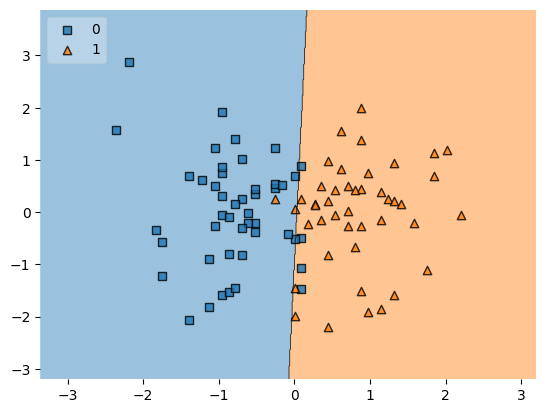

In [35]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2) # it will plot the regression models's decision boundry to classify data..

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))